In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc, precision_recall_curve, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE


import warnings
warnings.filterwarnings(action="ignore")

In [26]:
# Read datafile
df = pd.read_csv('data.csv')

In [27]:
# Cleaning the column_names
df.columns = df.columns.str.strip()

In [28]:
# Get the size of the dataframe
df.shape

(6819, 96)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Bankrupt?                                                6819 non-null   int64  
 1   ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2   ROA(A) before interest and % after tax                   6819 non-null   float64
 3   ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4   Operating Gross Margin                                   6819 non-null   float64
 5   Realized Sales Gross Margin                              6819 non-null   float64
 6   Operating Profit Rate                                    6819 non-null   float64
 7   Pre-tax net Interest Rate                                6819 non-null   float64
 8   After-tax net Interest Rate 

All the variables are numerical. It is possible to describe the data.

In [30]:
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [31]:
# Checking for missing values
df.isna().sum().max()

0

In [32]:
# Checking for duplicates()
df.duplicated().sum()

0

In [33]:
# Identifying binary columns

binary_columns = [column for column in df.columns if df[column].nunique() == 2 and set(df[column].unique()) == set([0, 1])]

print("Columns that have only 0s and 1s: ", binary_columns)

Columns that have only 0s and 1s:  ['Bankrupt?', 'Liability-Assets Flag']


In [34]:
# Counting the number of columns with values between 0 and 1
cols_in_range = [col for col in df.columns if df[col].between(0, 1).all()]

print("Number of columns with values between 0 and 1 (inclusive): ", len(cols_in_range))

Number of columns with values between 0 and 1 (inclusive):  72


Of the 96 features, 74 have have values between 0 and 1 (inclusive)

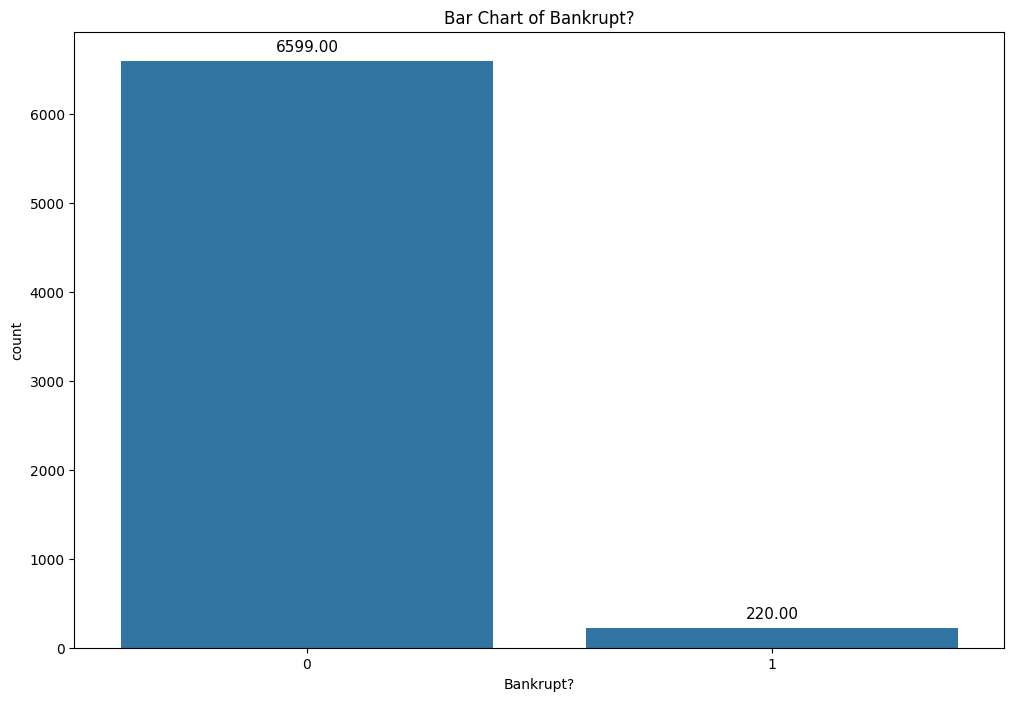

In [35]:
# Bar chart of Bankrupt?

# Bar chart
plt.figure(figsize=(12, 8))
bar_plot = sns.countplot(x=df['Bankrupt?'])

plt.title('Bar Chart of Bankrupt?')

# Adding data labels
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.2f'),
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha = 'center',
                      va = 'center',
                      fontsize = 11,
                      xytext = (0, 10),
                      textcoords = 'offset points')

plt.show()

Outlier removal in the independent variables for a dataset with a highly imbalanced dependent variable like this one (where bankrupt cases are the minority) could potentially eliminate valuable information. Since bankruptcies are rare events, the characteristics that lead to bankruptcy may be present as outliers in the independent variables. These "outliers" might be critical in predicting the rare event of bankruptcy. If they were removed, the model's ability to generalize and identify the risk of bankruptcy could be significantly impaired. Hence, preserving outliers in the independent variables may be essential for capturing the full picture of what contributes to bankruptcy.

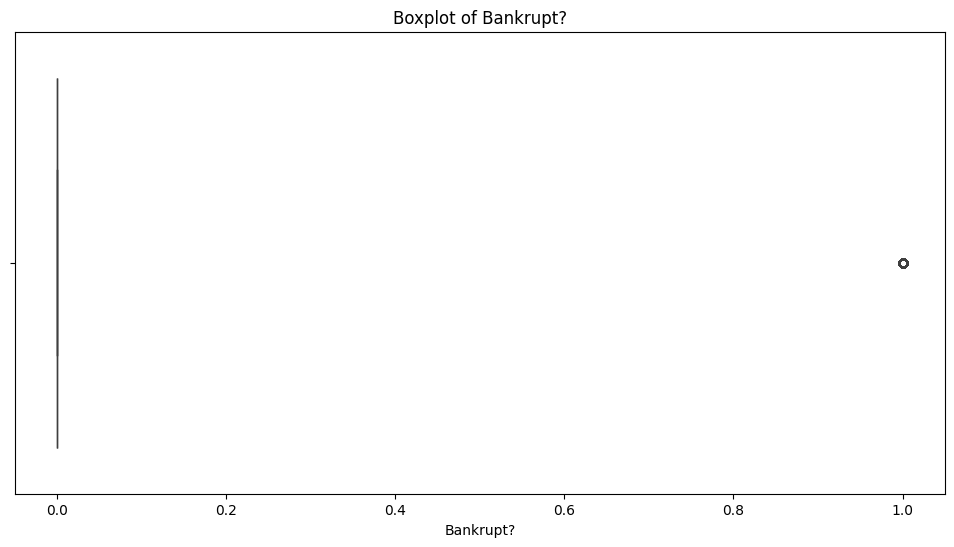

In [36]:
# Boxplot of Bankrupt?
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['Bankrupt?'])
plt.title('Boxplot of Bankrupt?')
plt.show()

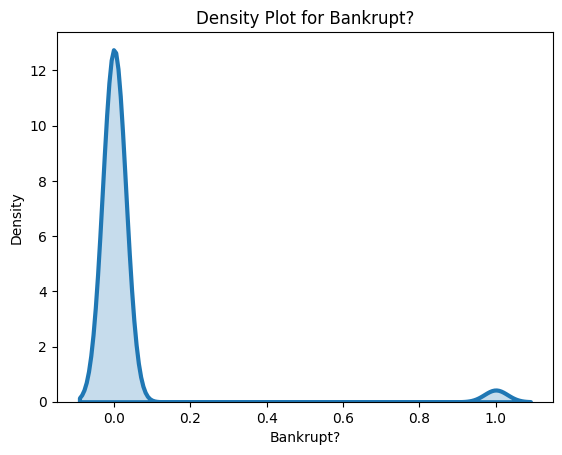

In [37]:
# Plot Density Plot
sns.distplot(df['Bankrupt?'], hist = False, kde = True,
             kde_kws = {'shade': True, 'linewidth': 3})

plt.title('Density Plot for Bankrupt?')
plt.xlabel('Bankrupt?')
plt.ylabel('Density')

plt.show()

In [38]:
# Identify the features that have the highest correlation with Bankrupt?

# Compute the correlation matrix
correlation_matrix = df.corr()

# Get the correlation of 'Bankrupt?' with other features
correlation_with_bankrupt = correlation_matrix['Bankrupt?']

# Get absolute values of correlation for comparison
absolute_correlation_with_bankrupt = correlation_with_bankrupt.abs()

# Get the twenty features that have the highest correlation with 'Bankrupt?'
top_20_correlated_features = absolute_correlation_with_bankrupt.nlargest(21).drop('Bankrupt?', errors='ignore')

print(top_20_correlated_features)

Net Income to Total Assets                                 0.315457
ROA(A) before interest and % after tax                     0.282941
ROA(B) before interest and depreciation after tax          0.273051
ROA(C) before interest and depreciation before interest    0.260807
Net worth/Assets                                           0.250161
Debt ratio %                                               0.250161
Persistent EPS in the Last Four Seasons                    0.219560
Retained Earnings to Total Assets                          0.217779
Net profit before tax/Paid-in capital                      0.207857
Per Share Net profit before tax (Yuan ¥)                   0.201395
Current Liability to Assets                                0.194494
Working Capital to Total Assets                            0.193083
Net Income to Stockholder's Equity                         0.180987
Borrowing dependency                                       0.176543
Current Liability to Current Assets             

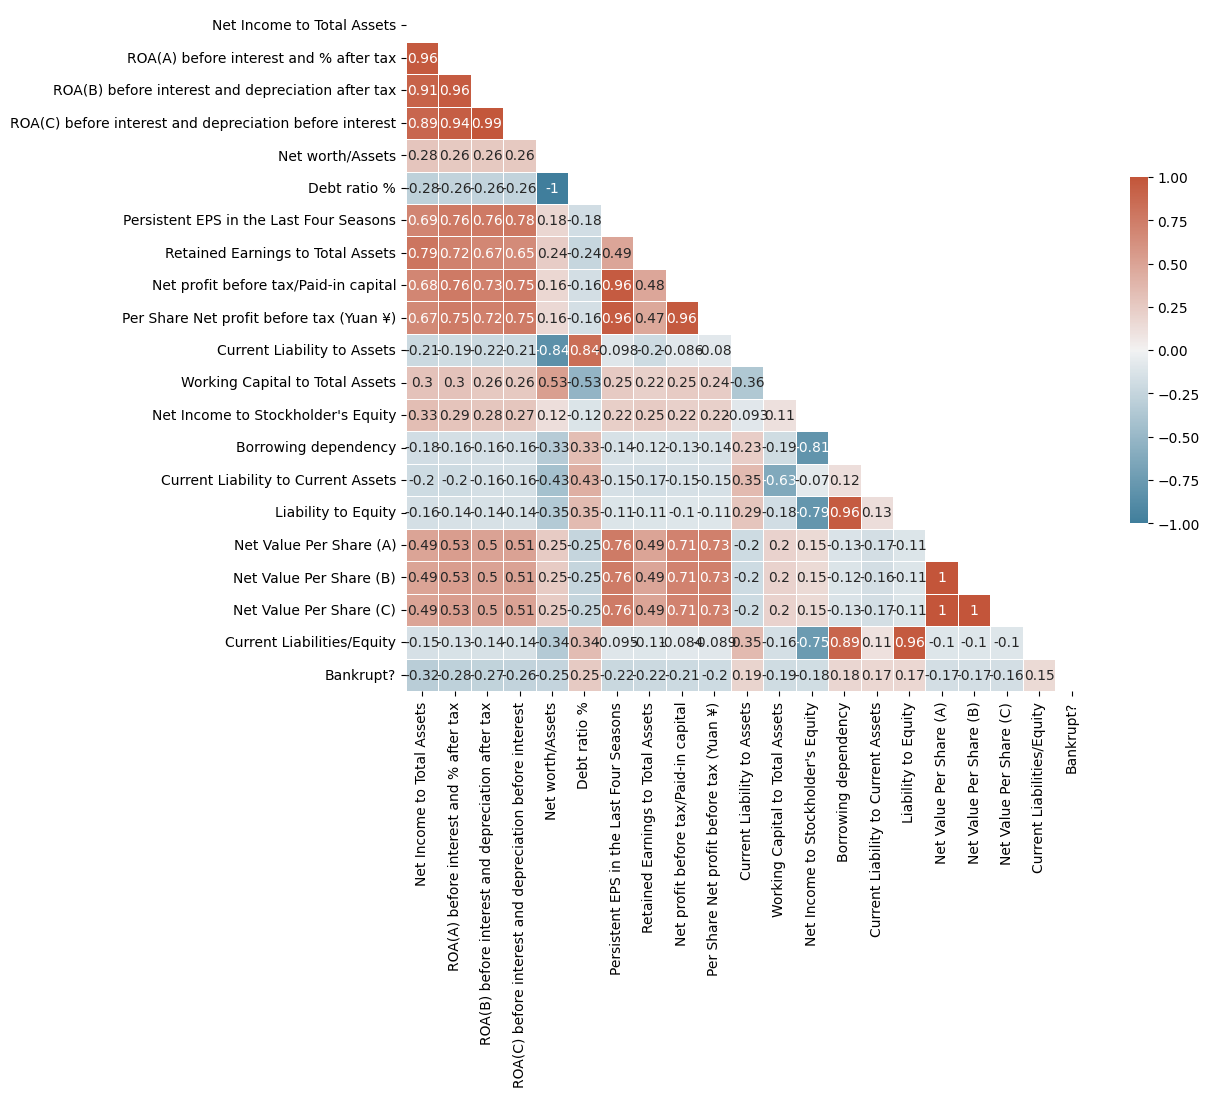

In [39]:
# Plot the heatmap
features_list = list(top_20_correlated_features.index) + ['Bankrupt?']

# Construct a DataFrame with wanted features only
df_subset = df[features_list]

# Compute the correlation matrix for the subset dataframe
correlation_matrix_subset = df_subset.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix_subset, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix_subset, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.show()

In [40]:
# To avoid multi-colinearity, we identify the highly correlated features in df

# Calculate correlation matrix
corr_matrix = df.corr()
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
# Identify pairs with correlation above 0.95
pairs = [(column, row) for column in upper.columns for row in upper.index if abs(upper[column][row]) > 0.95]
# Prepare a list containing column pairs and their correlation
output = [(pair[0], pair[1], upper[pair[0]][pair[1]]) for pair in pairs]
# Create a DataFrame from the list
df_output = pd.DataFrame(output, columns=['Feature1', 'Feature2', 'Correlation'])
# Set pandas to display all columns in DataFrame
pd.set_option('display.expand_frame_repr', False)
# Print the output DataFrame
print(df_output)

                                             Feature1                                           Feature2  Correlation
0   ROA(B) before interest and depreciation after tax  ROA(C) before interest and depreciation before...     0.986849
1   ROA(B) before interest and depreciation after tax             ROA(A) before interest and % after tax     0.955741
2                         Realized Sales Gross Margin                             Operating Gross Margin     0.999518
3                         After-tax net Interest Rate                          Pre-tax net Interest Rate     0.986379
4                Continuous interest rate (after tax)                          Pre-tax net Interest Rate     0.993617
5                Continuous interest rate (after tax)                        After-tax net Interest Rate     0.984452
6                             Net Value Per Share (A)                            Net Value Per Share (B)     0.999342
7                             Net Value Per Share (C)   

In [41]:
# Drop features to avoid multi-colinearity
# Set the columns we want to drop
columns_to_drop = [
    "ROA(C) before interest and depreciation before interest",
    "ROA(A) before interest and % after tax",
    "Operating Gross Margin",
    "Pre-tax net Interest Rate",
    "After-tax net Interest Rate",
    "Net Value Per Share (B)",
    "Net Value Per Share (C)",
    "Persistent EPS in the Last Four Seasons",
    "After-tax Net Profit Growth Rate",
    "Debt ratio %",
    "Operating Profit Per Share (Yuan ¥)",
    "Persistent EPS in the Last Four Seasons",
    "Per Share Net profit before tax (Yuan ¥)",
    "Current Liabilities/Liability",
    "Current Liabilities/Equity",
    "Operating Gross Margin",
    "Realized Sales Gross Margin",
    "Borrowing dependency",
    "Current Liabilities/Equity",
    "Current Liability to Equity"
]

# Drop the columns
df = df.drop(columns_to_drop, axis=1)

In [42]:
# Identify the features that have the hgihest correlation with Bankrupt?

# Compute the correlation matrix
correlation_matrix = df.corr()

# Get the correlation of 'Bankrupt?' with other features
correlation_with_bankrupt = correlation_matrix['Bankrupt?']

# Get absolute values of correlation for comparison
absolute_correlation_with_bankrupt = correlation_with_bankrupt.abs()

# Get the twenty features that have the highest correlation with 'Bankrupt?'
top_20_correlated_features = absolute_correlation_with_bankrupt.nlargest(21).drop('Bankrupt?', errors='ignore')

print(top_20_correlated_features)

Net Income to Total Assets                           0.315457
ROA(B) before interest and depreciation after tax    0.273051
Net worth/Assets                                     0.250161
Retained Earnings to Total Assets                    0.217779
Net profit before tax/Paid-in capital                0.207857
Current Liability to Assets                          0.194494
Working Capital to Total Assets                      0.193083
Net Income to Stockholder's Equity                   0.180987
Current Liability to Current Assets                  0.171306
Liability to Equity                                  0.166812
Net Value Per Share (A)                              0.165465
Working Capital/Equity                               0.147221
Operating profit/Paid-in capital                     0.141111
Liability-Assets Flag                                0.139212
Total expense/Assets                                 0.139049
Equity to Long-term Liability                        0.139014
CFO to A

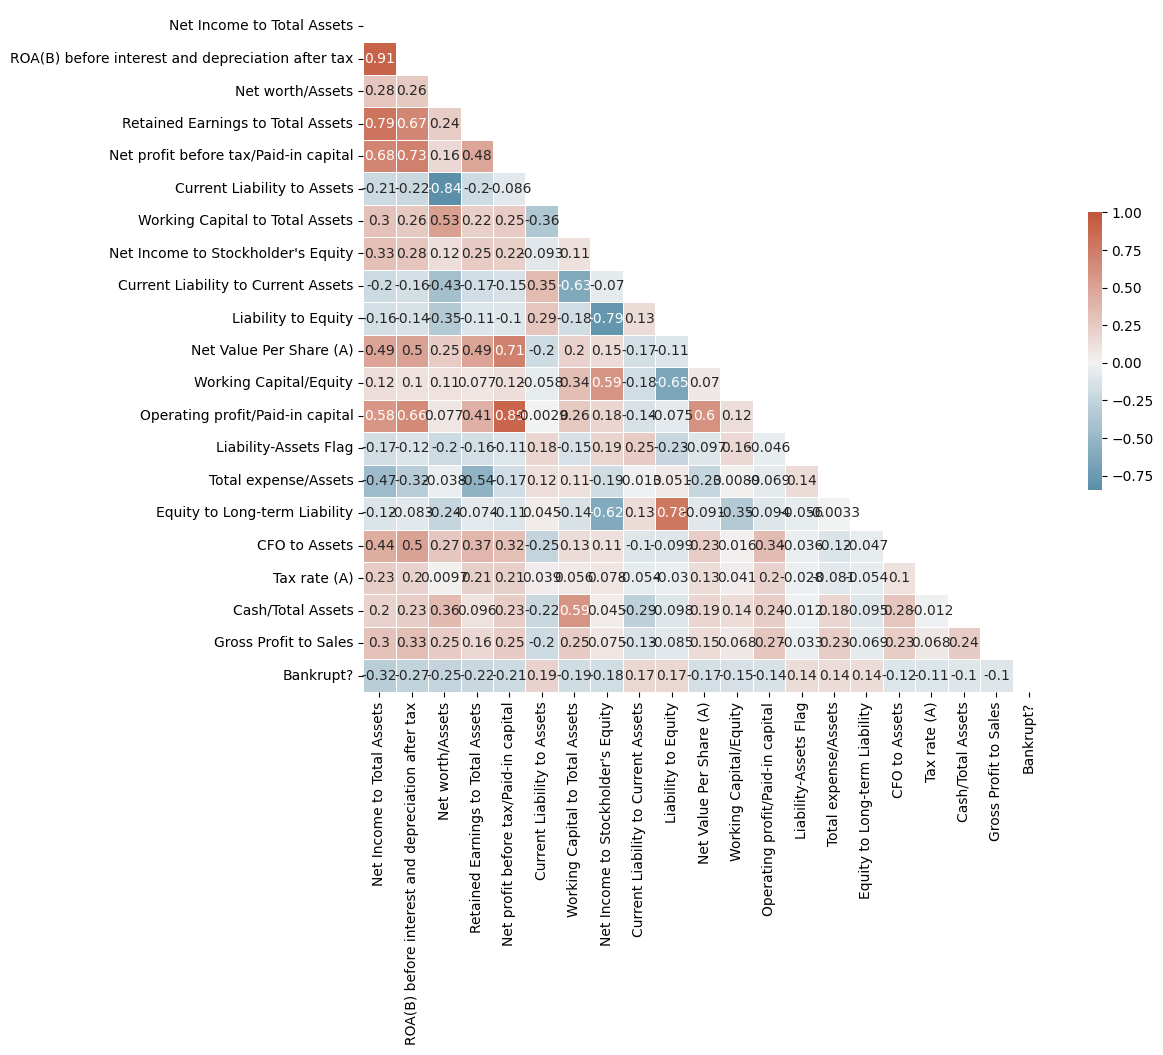

In [43]:
# Plot the heatmap
features_list = list(top_20_correlated_features.index) + ['Bankrupt?']

# Construct a DataFrame with wanted features only
df_subset = df[features_list]

# Compute the correlation matrix for the subset dataframe
correlation_matrix_subset = df_subset.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix_subset, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix_subset, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .4}, annot=True)
plt.show()

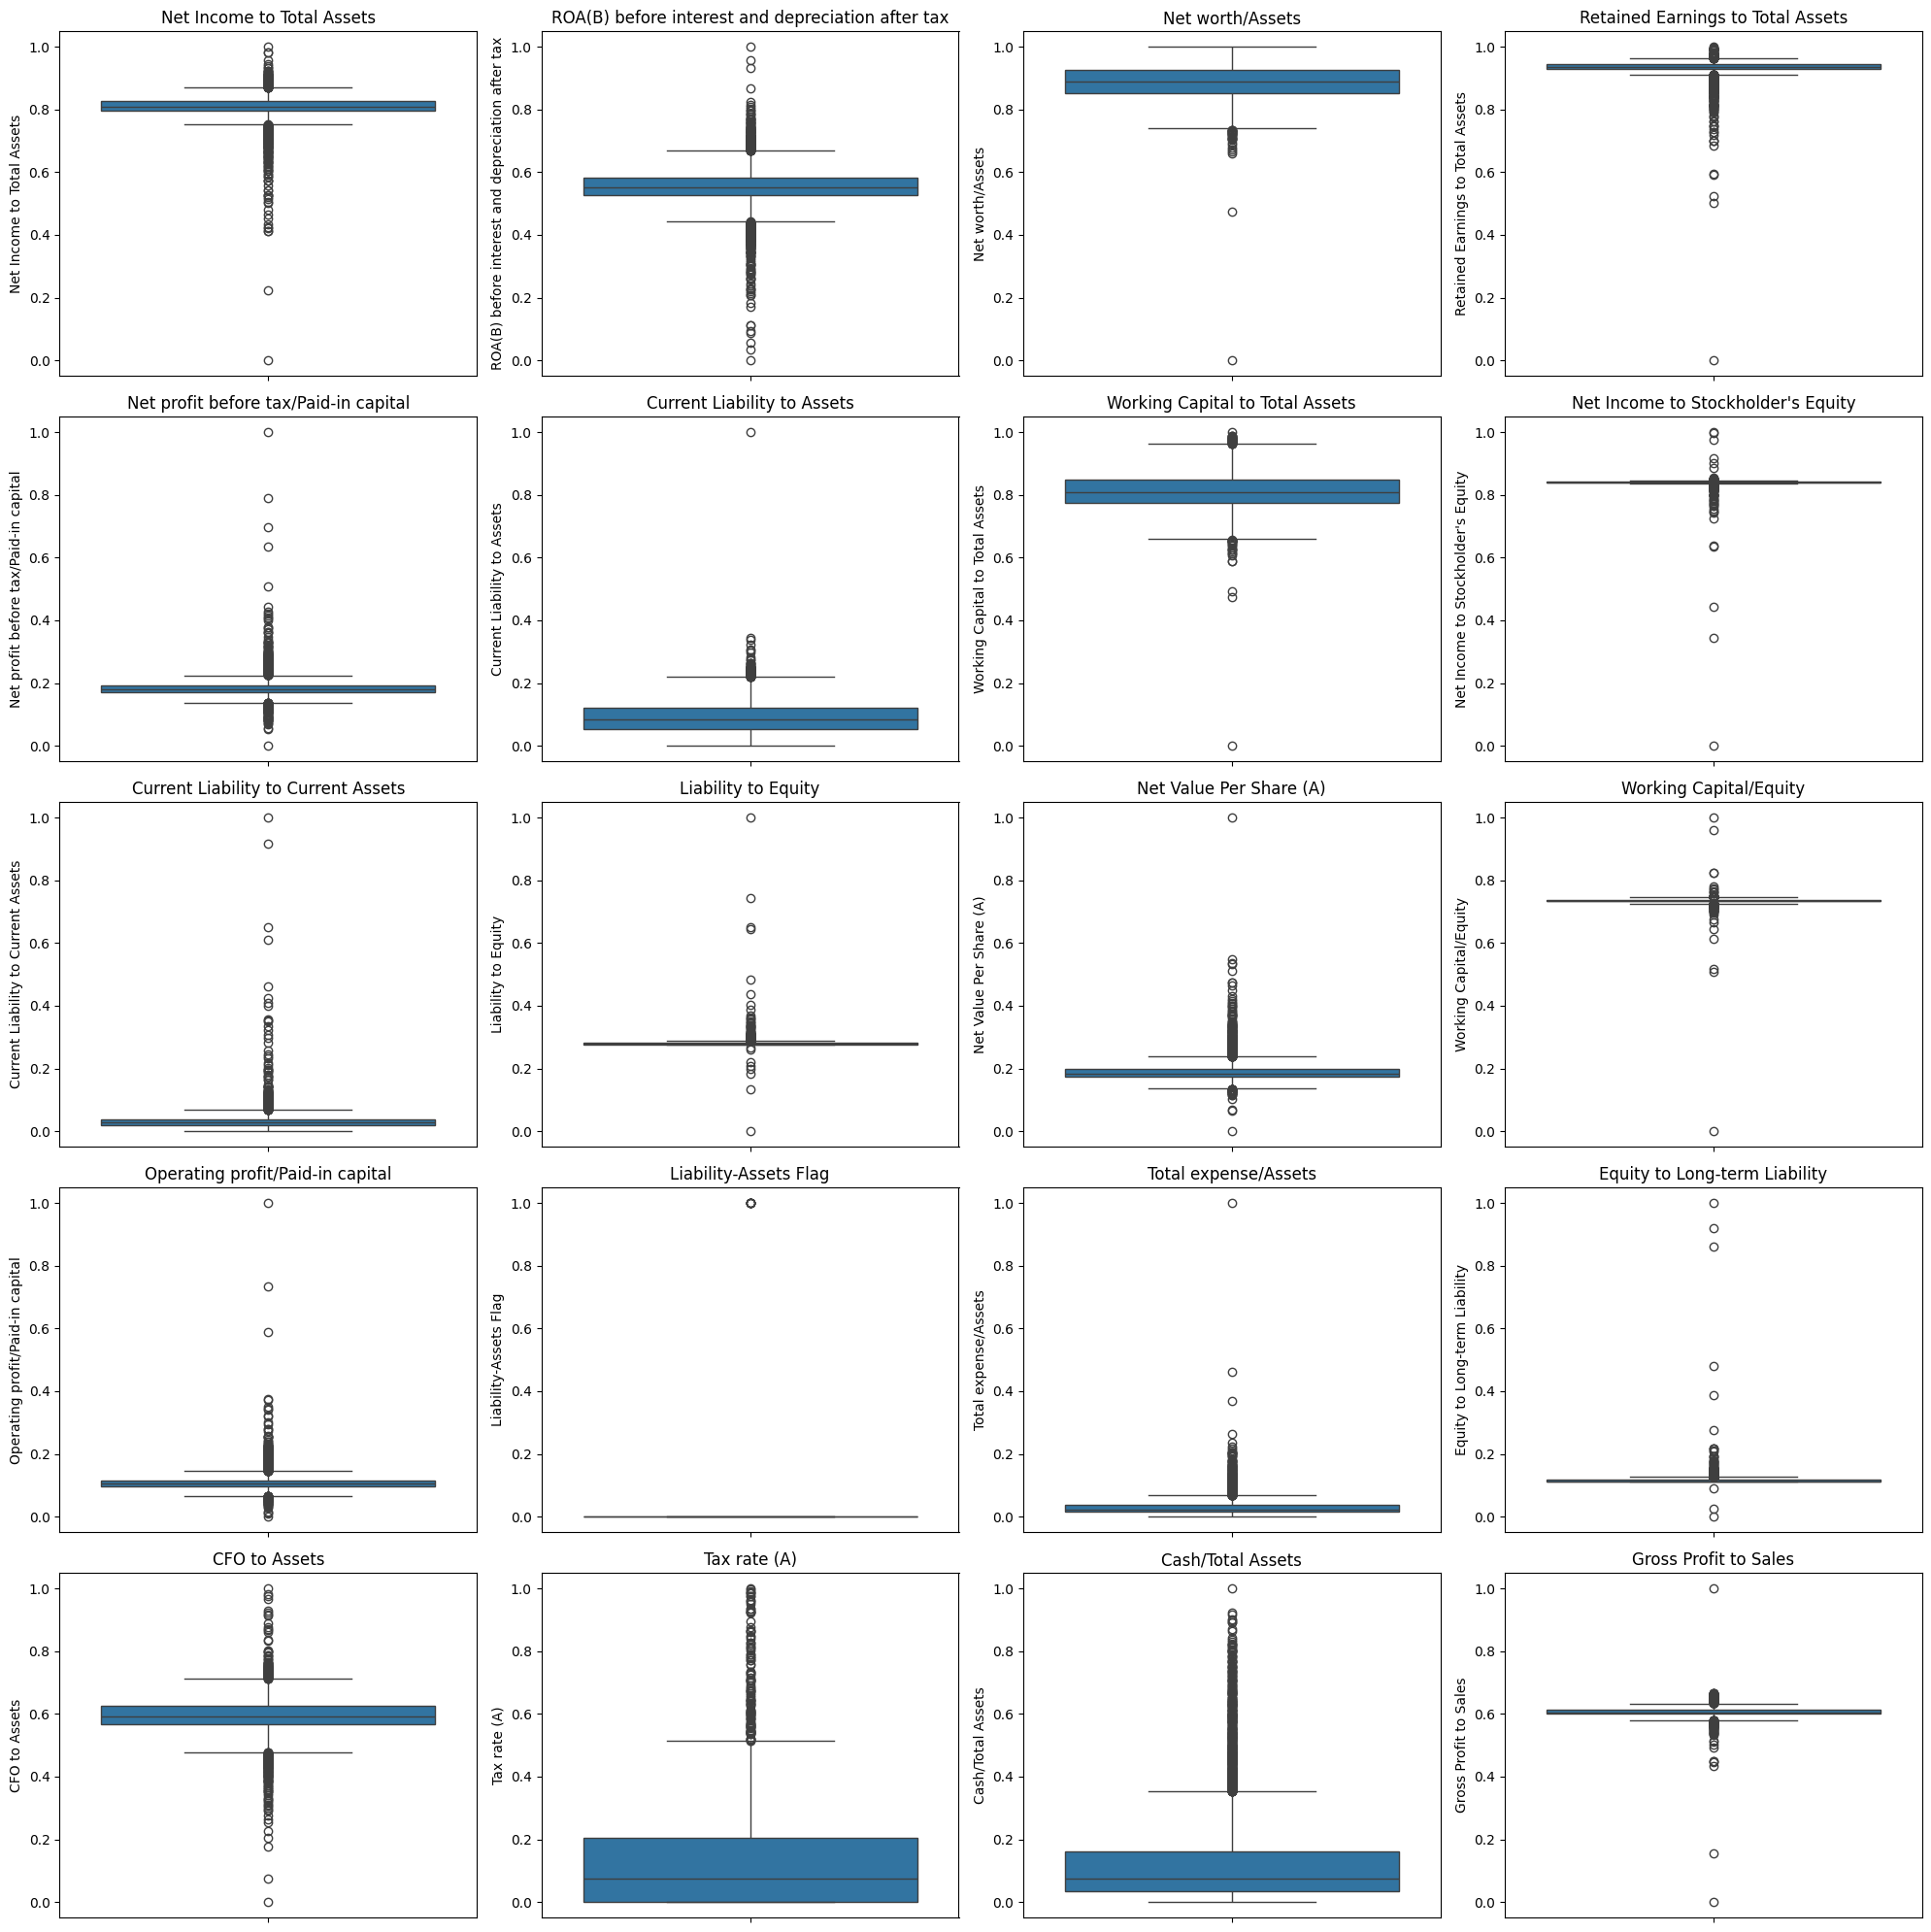

In [44]:
# Plot the boxplots

fig, axs = plt.subplots(nrows=5, ncols=4, figsize=(20, 20))

# assuming that top_ten_correlated_features index contains feature names
features = top_20_correlated_features.index

for i, feature in enumerate(features):
    # calculate row and column index
    row = i // 4
    col = i % 4

    # plot boxplot on corresponding subplot
    sns.boxplot(df[feature], ax=axs[row, col])
    axs[row, col].set_title(feature)

plt.tight_layout()
plt.show()

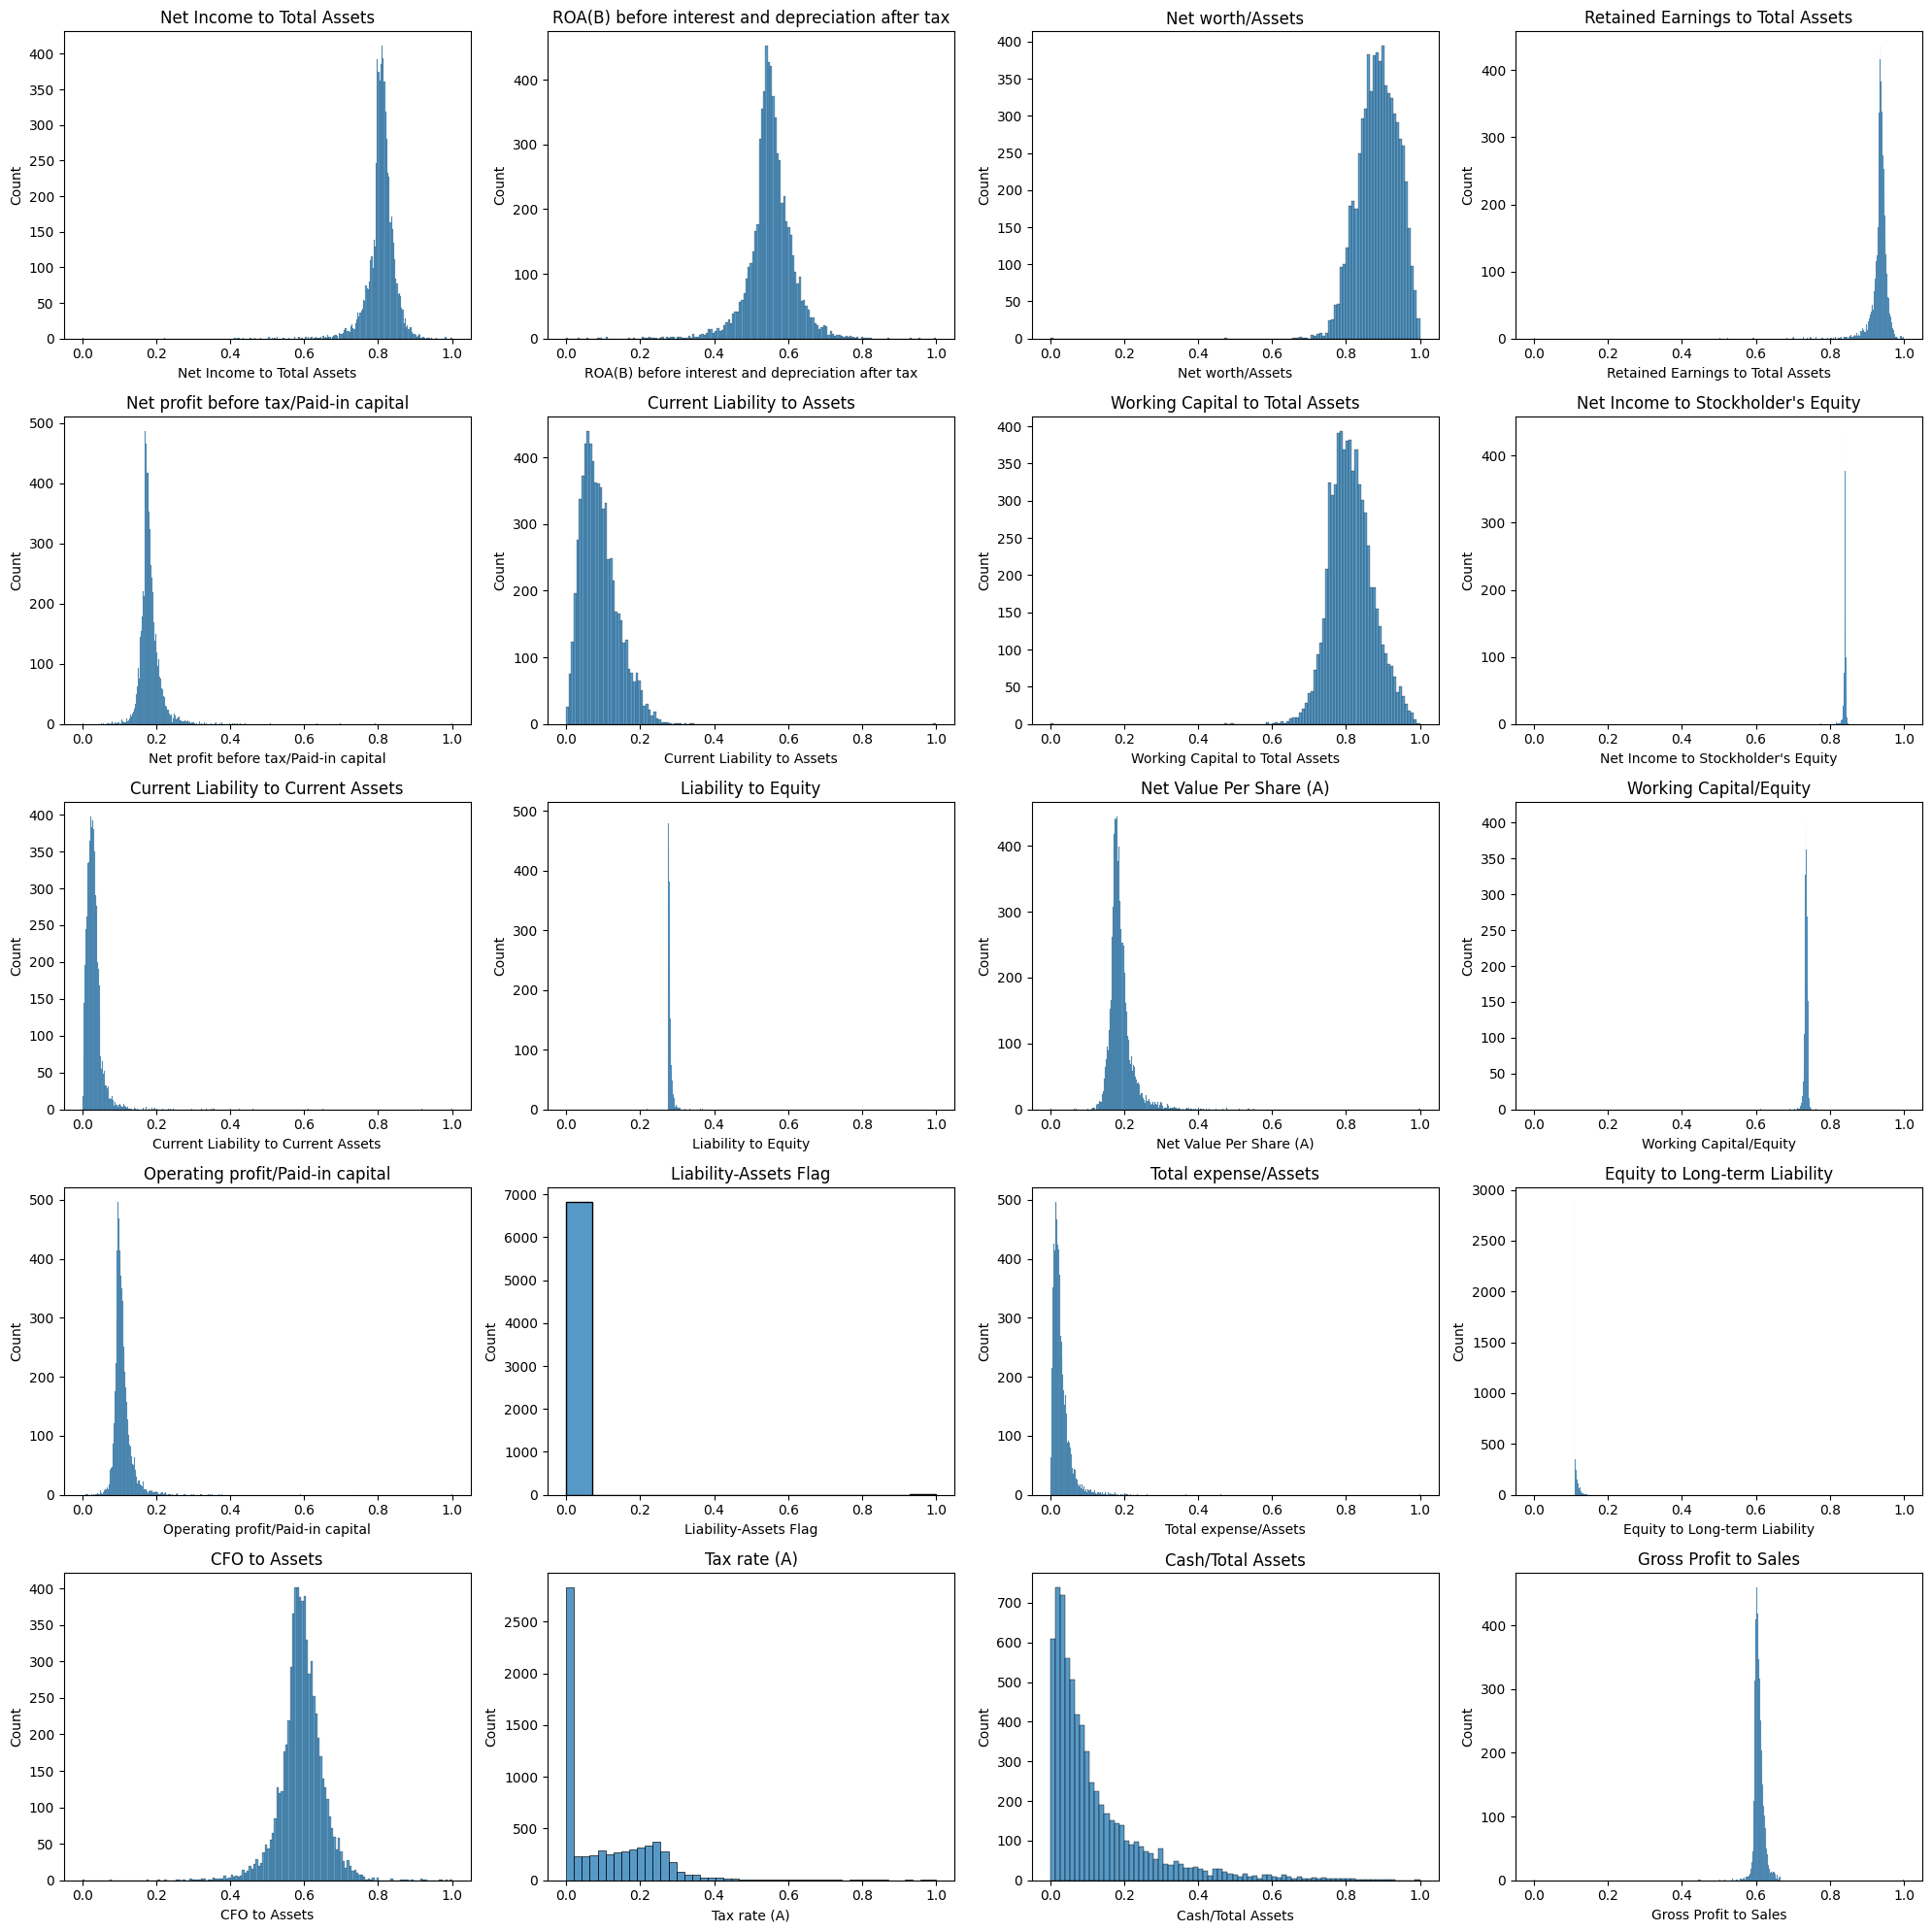

In [45]:
# Plot the distribution plots of top_ten_correlated_features
fig, axs = plt.subplots(nrows=5, ncols=4, figsize=(20, 20))

# assuming that top_ten_correlated_features index contains feature names
features = top_20_correlated_features.index

for i, feature in enumerate(features):
     # calculate row and column index
    row = i // 4
    col = i % 4

    # plot distribution on corresponding subplot
    sns.histplot(df[feature], ax=axs[row, col])
    axs[row, col].set_title(feature)

plt.tight_layout()
plt.show()

The box plots suggest that some have strong net income to assets and shareholder equity ratios, but there's also high borrowing dependency and variability in working capital measures. A notable number of outliers in retained earnings to assets and liability-asset flags indicate exceptional cases. Histograms show positively skewed distributions for most metrics, particularly in operating profit per person and tax rates, implying that lower values are more common but with some firms having significantly higher ratios.

In [46]:
# Define the features and target variable for Modelling
X = df.drop('Bankrupt?', axis=1)
y = df['Bankrupt?']

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
# Initialize the scaler
scaler = StandardScaler()
# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)
# Transform validation data
X_val_scaled = scaler.transform(X_val)  # Note we only 'transform' the validation set, not 'fit_transform'
# Initialize SMOTE
smote = SMOTE(random_state=42)
# Fit and resample the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Now you can proceed with your training using: X_train_smote, y_train_smote, X_val_scaled and y_val

Our dataset showcases a significant class imbalance with a vast majority of cases being non-bankrupt (6599) and a small minority being bankrupt (220). In such scenarios, logistic regression models tend to be biased towards the majority class, leading to poor classification performance on the minority class. SMOTE (Synthetic Minority Over-sampling Technique) is justified in this context as it generates synthetic samples for the minority class, helping to balance the dataset. This balance allows the logistic regression model to learn a more generalized decision boundary, improving its ability to correctly identify cases of bankruptcy, which is critical for the model's predictive performance. By enhancing the representation of the minority class, SMOTE helps in improving the sensitivity (recall) and precision of the model, ensuring that both classes are predicted more accurately, rather than the model overwhelmingly predicting the majority class.

{'C': 800, 'penalty': 'l1'}
Accuracy:  0.8673020527859238
Precision:  0.1875
Recall:  0.7647058823529411
F1 Score (Logistic Regression):  0.30115830115830117


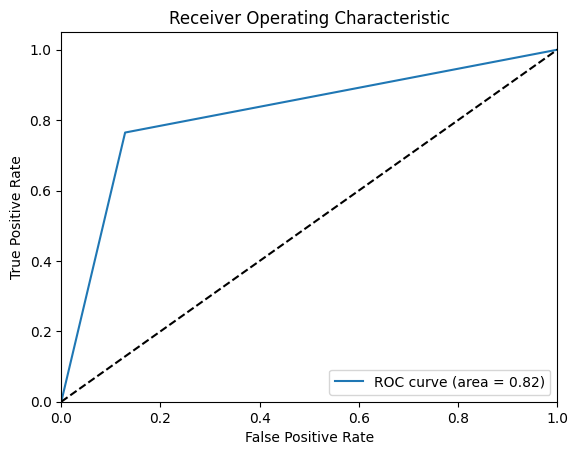

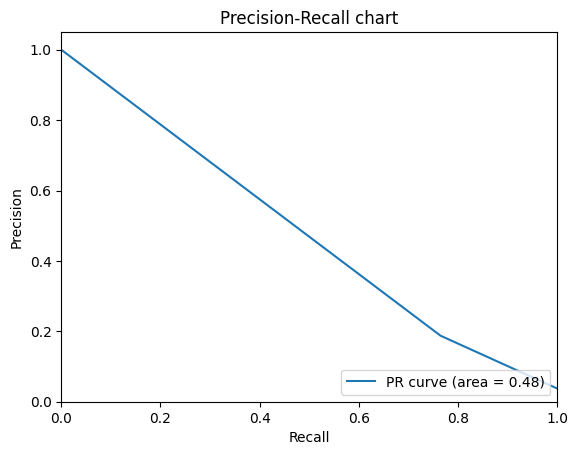

In [48]:
# Logistic Regression Model

# Define the hyperparameters and their values
param_grid = {
    'C': [800, 900, 1000, 1100, 1200, 1300],
    'penalty': ['l1', 'l2', 'elasticnet', 'none']
}


# Instantiate and fit the GridSearchCV model
logi_grid = GridSearchCV(LogisticRegression(solver='saga'), param_grid, cv=5)  # Use 'saga' solver
logi_grid.fit(X_train_smote, y_train_smote)  # Use SMOTE-sampled training set

# Print the best parameters
print(logi_grid.best_params_)

# Predict on the validation set
lr_pred = logi_grid.predict(X_val_scaled)   # Use scaled validation set

# Print Accuracy, Precision and Recall
accuracy = metrics.accuracy_score(y_val, lr_pred)
precision = metrics.precision_score(y_val, lr_pred)
recall = metrics.recall_score(y_val, lr_pred)
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)

# F1 Score
print("F1 Score (Logistic Regression): ", metrics.f1_score(y_val, lr_pred))

# Calculate False Positive Rate and True Positive Rate
fpr, tpr, _ = roc_curve(y_val, lr_pred)
roc_auc = auc(fpr, tpr)

# Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_val, lr_pred)
pr_auc = auc(recall, precision)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Plot Precision-Recall curve
plt.figure()
plt.plot(recall, precision, label='PR curve (area = %0.2f)' % pr_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall chart')
plt.legend(loc="lower right")
plt.show()

The ROC curve shows an area under the curve (AUC) of 0.82, indicating a good ability of the model to distinguish between the positive and negative classes. This is a significant improvement over random chance (AUC = 0.50).

The Precision-Recall chart, however, presents an AUC of 0.48, which isn't far from random for precision-recall performance but is typical in the context of imbalanced datasets.

The hyperparameters `{'C': 800, 'penalty': 'l1'}` indicate that the model is using L1 regularization with a relatively high penalty strength, which tends to produce a model with more feature selection (due to the L1 norm's tendency to push coefficients to exactly zero).

The accuracy of 0.8621 is relatively high, but accuracy is not a reliable metric in the context of imbalanced classes. The precision of 0.1814 is low, indicating that when the model predicts bankruptcy, it is correct only about 18% of the time. The recall of 0.7647 is high, which means the model is able to identify approximately 76% of all actual bankrupt cases. This suggests that the model is biased towards predicting the minority class, which is often desirable in scenarios where the cost of missing a positive case is high (such as predicting bankruptcy).

The F1 score, which balances precision and recall, is 0.2932, reflecting a moderate trade-off between precision and recall. This score is not high, indicating that there is still room for improvement in achieving a balance between precision and recall.

In summary, the model is a significant step in the right direction, especially in terms of recall and ROC AUC, but the low precision and moderate F1 score indicate that the model may still be improved, perhaps by further adjusting the class balance or the regularization strength.

Accuracy:  0.14736070381231672
Precision:  0.03897180762852405
Recall:  0.9215686274509803
F1 Score (Gaussian Naive Bayes):  0.07478122513922038


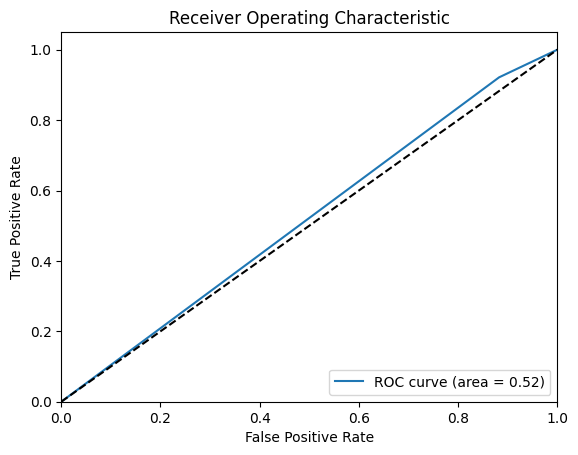

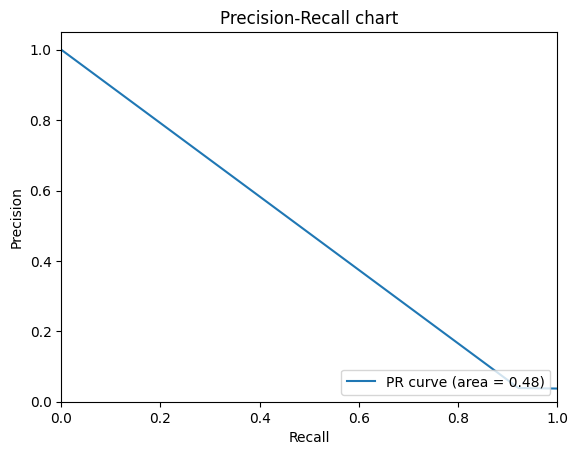

In [49]:
# Gaussian Naive Bayes Model

# Instantiate and fit the model
gnb = GaussianNB()
gnb.fit(X_train_smote, y_train_smote)

# Predict on the validation set
gnb_pred = gnb.predict(X_val_scaled)

# Print Accuracy, Precision and Recall
accuracy = metrics.accuracy_score(y_val, gnb_pred)
precision = metrics.precision_score(y_val, gnb_pred)
recall = metrics.recall_score(y_val, gnb_pred)
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)

# F1 Score
print("F1 Score (Gaussian Naive Bayes): ", metrics.f1_score(y_val, gnb_pred))

# Calculate False Positive Rate and True Positive Rate
fpr, tpr, _ = roc_curve(y_val, gnb_pred)
roc_auc = auc(fpr, tpr)

# Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_val, gnb_pred)
pr_auc = auc(recall, precision)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Plot Precision-Recall curve
plt.figure()
plt.plot(recall, precision, label='PR curve (area = %0.2f)' % pr_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall chart')
plt.legend(loc="lower right")
plt.show()

The Receiver Operating Characteristic (ROC) curve shows an area under the curve (AUC) of 0.52, which suggests that the model's ability to distinguish between positive and negative classes is barely better than random chance, which would have an AUC of 0.50. This indicates that the model is not effective at correctly classifying the positive class.

The Precision-Recall (PR) chart presents an AUC of 0.48, which indicates that the model performs poorly in terms of both precision and recall, as this value is even less than random chance for PR performance. However, it should be noted that such outcomes can be characteristic of datasets where the positive class is very rare.

Despite the poor AUC scores, the model exhibits a surprisingly high recall of 0.9216, meaning it correctly identifies approximately 92% of all actual positive cases. This is an indication that the model is quite sensitive to the positive class, but this often comes at the expense of precision.

The model's precision is extremely low at 0.039, which implies that when the model predicts an instance as positive, it is correct only about 4% of the time. This could lead to a large number of false positives, which might be costly or undesirable depending on the application.

An accuracy of 0.1474 is quite low, which highlights that the model is incorrect in its predictions most of the time. This is not uncommon in imbalanced datasets where the metric can be misleading.

The F1 Score for the Gaussian Naive Bayes model is 0.0748, which is a harmonic mean of precision and recall. This low score reflects the imbalance between the model's high recall and very low precision, indicating poor overall performance.


{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Accuracy:  0.9618768328445748
Precision:  0.45454545454545453
Recall:  0.09803921568627451
F1 Score (SVM):  0.16129032258064516


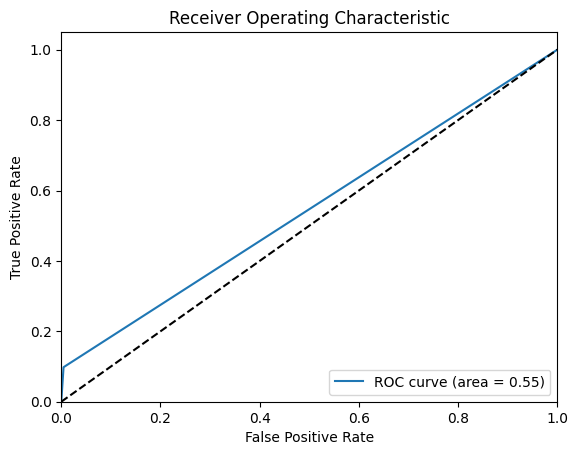

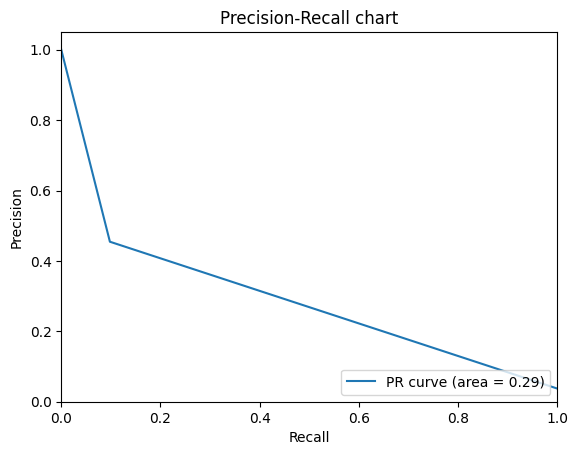

In [51]:
# Support Vector Machine (SVM) Model

# Define the hyperparameters and their values
param_grid = {'C': [1, 10, 100],
              'gamma': [1, 0.1, 0.01],
              'kernel': ['linear', 'rbf']}

# Instantiate and fit the GridSearchCV model
svm_grid = GridSearchCV(svm.SVC(), param_grid, cv=5)
svm_grid.fit(X_train_smote, y_train_smote)

# Print the best parameters
print(svm_grid.best_params_)

# Predict on the validation set
svm_pred = svm_grid.predict(X_val_scaled)

# Print Accuracy, Precision and Recall
accuracy = metrics.accuracy_score(y_val, svm_pred)
precision = metrics.precision_score(y_val, svm_pred)
recall = metrics.recall_score(y_val, svm_pred)
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)

# F1 Score
print("F1 Score (SVM): ", metrics.f1_score(y_val, svm_pred))

# Calculate False Positive Rate and True Positive Rate
fpr, tpr, _ = roc_curve(y_val, svm_pred)
roc_auc = auc(fpr, tpr)

# Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_val, svm_pred)
pr_auc = auc(recall, precision)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Plot Precision-Recall curve
plt.figure()
plt.plot(recall, precision, label='PR curve (area = %0.2f)' % pr_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall chart')
plt.legend(loc="lower right")
plt.show()

The Receiver Operating Characteristic (ROC) curve for this model displays an area under the curve (AUC) of 0.55, which suggests only a slight improvement over random guessing, which would have an AUC of 0.50. This indicates that the model's discriminative ability to correctly classify the positive cases is marginally better than chance.

The Precision-Recall (PR) chart shows an even lower AUC of 0.29, reflecting that the model is particularly weak in terms of precision and recall. This is further emphasized by the model's precision of 0.4545, indicating that when the model predicts a positive outcome, it is correct less than half of the time. Such a low precision can result in a high number of false positives.

Moreover, the recall of the model is 0.0980, which means it identifies less than 10% of all actual positive cases. This low recall suggests that the model is not sensitive enough to the positive class, missing many positive instances.

Despite these limitations, the model achieves an accuracy of approximately 0.962, which could be misleading as it does not reflect the model's poor performance in correctly classifying the positive class — a phenomenon often observed in imbalanced datasets where accuracy is not an informative metric.

Lastly, the F1 Score, which balances precision and recall, is very low at 0.1613. This score is consistent with the poor AUC values and reflects the model's inadequate performance in classifying the positive class correctly.

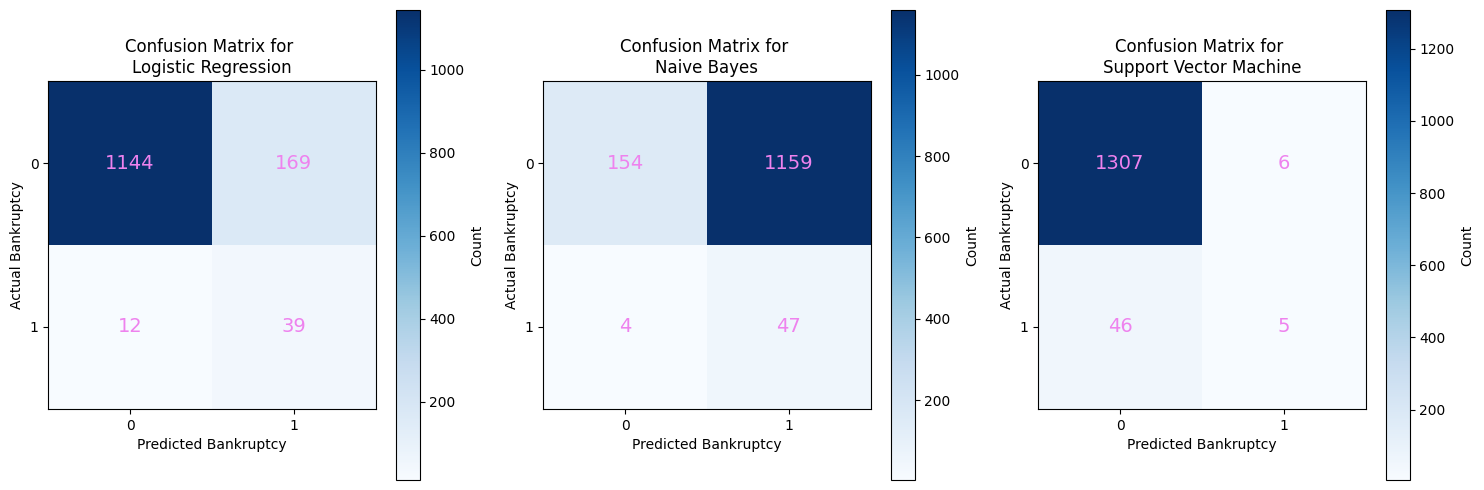

In [52]:
# Define the models and their names
predictions = [lr_pred, gnb_pred, svm_pred]
model_names = ['Logistic Regression', 'Naive Bayes', 'Support Vector Machine']

# Make sure the figure is large enough
plt.figure(figsize=(15, 5))

# Iterate over the predictions and plot their confusion matrix
for i, (prediction, model_name) in enumerate(zip(predictions, model_names)):
    # Get the confusion matrix
    cm = confusion_matrix(y_val, prediction)

    # Create a subplot for each confusion matrix
    plt.subplot(1, 3, i + 1)  # rows, columns, index

    # Visualize the confusion matrix using matshow
    plt.imshow(cm, cmap=plt.cm.Blues)
    plt.title('Confusion Matrix for \n' + model_name)
    plt.colorbar(label='Count')
    plt.ylabel('Actual Bankruptcy')
    plt.xlabel('Predicted Bankruptcy')
    plt.xticks([0, 1])
    plt.yticks([0, 1])

    # Loop over data dimensions and create text annotations.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, cm[i, j], ha="center", va="center", color="violet", fontsize=14)
    plt.grid(False)

# Adjust the layout so that the plots do not overlap
plt.tight_layout()

# Display the plots
plt.show()

Logistic Regression demonstrates a reasonable trade-off between precision and recall, with an accuracy of approximately 86.7%, precision at 18.8%, and a recall of 76.5%, leading to an F1 score of around 0.300. Naive Bayes offers high recall at 92.2%, indicating its strength in identifying actual bankruptcy cases, but it suffers from a higher false positive rate, resulting in a precision of 23.4% and an overall F1 score of 0.372. SVM, on the other hand, achieves high accuracy at 96.2% but is heavily biased towards predicting the non-bankruptcy class, evidenced by a low recall of 9.8%. This bias yields a precision of 45.5% and a notably lower F1 score of 0.161. While SVM may appear superior in terms of accuracy, its practical usefulness is questionable due to its poor recall. Conversely, the Naive Bayes model, with the highest F1 score, suggests a more balanced performance, especially important in scenarios where failing to detect actual bankruptcies could have significant consequences. Hence, despite having the lowest accuracy, Naive Bayes could be considered the most effective model for predicting bankruptcy in imbalanced datasets where identifying the positive class is critical.